In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import colors

plt.rcParams["font.family"] = "monospace" #sets the fonts to be used by the plots later on
plt.rcParams.update({'font.size': 18})


pi=np.pi

# Define the functions for later use: 

Functions to check for the various parameters are defined below: 

In [2]:
def randrad(rad,seedX,seedY):
    
    "Defines a random position around a circle of radius rad"
    
    theta=2*pi*random.random() #random.random() chooses a random float between 0 and 1
    x=int(rad*np.cos(theta))+seedX #takes random theta and places walker at radius rad away
    y=int(rad*np.sin(theta))+seedY
    position=[x,y]
    return position


def position_check(position,squaresize,lattice):
    
    '''Checks the position of the walker based on a set 
       of conditions. Based on fulfillment of conditions
       walker continues or new walker is created.'''
    
    edge = False 
    stick = False
    exit = False
    
    if (position[1] + 1) > squaresize - 1: #check whether walker is at edge
        edge=True
    elif (position[1] - 1) < 1:
        edge=True
    elif (position[0] + 1) > squaresize - 1:
        edge=True
    elif (position[0] - 1) < 1:
        edge=True
    
    if not edge:
    #now check for either neighbours or the edge of the circle in the 4 surrounding directions     
        ndown=lattice[position[1]+1,position[0]]
        if ndown==1 or ndown>1:
            stick=True
        if ndown==-1:
            exit=True
            
        nup=lattice[position[1]-1,position[0]]
        if nup==1 or nup>1:
            stick=True
        if nup==-1:
            exit=True
            
        nright=lattice[position[1],position[0]+1]
        if nright==1 or nright>1:
            stick=True
        if nright==-1:
            exit=True
        
        nleft=lattice[position[1],position[0]-1]
        if nleft==1 or nleft>1:
            stick=True
        if nleft==-1:
            exit=True
         
    #we can now start the random walk if the requirements are met
    if not stick and not edge: 
        walk=random.random() #chooses random float and decides direction based on size of float
        if walk<0.25:
            position=[position[0],position[1]+1]            
        elif walk<0.5:
            position=[position[0]+1,position[1]]                
        elif walk<0.75:
            position=[position[0],position[1]-1]                
        elif walk<1 or walk==1: 
            position=[position[0]-1,position[1]]
         
    return(position,stick,edge,exit)
            
    
            
            
        
        

# Define function for DLA Process
Now that we have instructions for the generated random walkers we can initiate the aggregation process

Still going, generated 2  random walkers.  Cluster mass:  0
Still going, generated 502  random walkers.  Cluster mass:  8
Still going, generated 1002  random walkers.  Cluster mass:  21
Still going, generated 1502  random walkers.  Cluster mass:  40
Still going, generated 2002  random walkers.  Cluster mass:  61
Still going, generated 2502  random walkers.  Cluster mass:  74
Still going, generated 3002  random walkers.  Cluster mass:  97
Still going, generated 3502  random walkers.  Cluster mass:  112
Still going, generated 4002  random walkers.  Cluster mass:  134
Still going, generated 4502  random walkers.  Cluster mass:  154
Still going, generated 5002  random walkers.  Cluster mass:  168
Still going, generated 5502  random walkers.  Cluster mass:  194
Still going, generated 6002  random walkers.  Cluster mass:  213
Still going, generated 6502  random walkers.  Cluster mass:  228
Still going, generated 7002  random walkers.  Cluster mass:  247
Still going, generated 7502  random wa

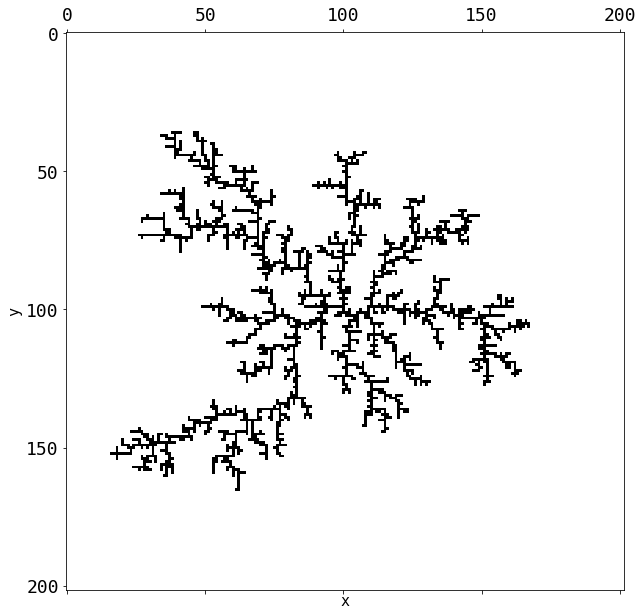

2424


(2423,
 array([[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        ...,
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]]))

In [3]:
def DLA(rad):
    
    '''Runs and plots a diffusion limited aggreation system
       rad is the radius of the circle from which walkers 
       are generated '''
    
    seedX=rad+2
    seedY=rad+2
    squaresize=rad*2+2 #ensures the lattice is greater than radius
    
    lattice=np.zeros((squaresize,squaresize))
    
    walkercount=0 #intial amount of walkers is 0 
    completecluster=False
    newwalker=0 
    clustercount=[] 
    
    colours = colors.ListedColormap(['white','white', 'black'])
    
    
    for i in range(0,squaresize):
        for j in range(0,squaresize): 
            if i==seedY and j==seedX:
                lattice[i][j]=1
                
            elif np.sqrt((seedX-j)**2+(seedY-i)**2)>rad:
                lattice[i][j]=-1
    

    
    while not completecluster:
        walkercount+=1
        random.seed()
        
        position=randrad(rad,seedX,seedY) #randrad function from earlier section to randomly generate walker 
        stick=False
        edge=False
        
        while not stick and not edge:
            positionNew,stick,edge,exit=position_check(position,squaresize,lattice)

            if stick:
                clustercount.append(newwalker)
                if len(clustercount)<100:
                    lattice[position[1]][position[0]]=1
                    newwalker+=1
                    
                elif len(clustercount)<200:
                    lattice[position[1]][position[0]]=1#change these to higher integers for colour change
                    newwalker+=1                      #e.g. if site==2 colour it red
                    
                elif len(clustercount)<300:
                    lattice[position[1]][position[0]]=1
                    newwalker+=1
            
                elif len(clustercount)<400:
                    lattice[position[1]][position[0]]=1
                    newwalker+=1
                
                elif len(clustercount)<500:
                    lattice[position[1]][position[0]]=1
                    newwalker+=1
                    
                elif len(clustercount)>500:
                    lattice[position[1]][position[0]]=1
                    newwalker+=1
                    
                    
                
            else:
                position=positionNew
        
     
       
        update=range(2,300000,500) #give updates at set intervals 
        if walkercount in update:
            print("Still going, generated",walkercount," random walkers."," Cluster mass: ", newwalker)
                
       
       
        if walkercount==300000:
            print("Break loop. Too many cycles") #break loop if taking too long
            completecluster = True
            
                           
        if stick and exit:
            print("Cluster mass",newwalker)
            completecluster = True
    
 
                
    plt.figure(figsize=(10,10))                       
    plt.matshow(lattice,interpolation="nearest",fignum=1,cmap=colours)
    plt.xlabel(r"x", fontsize=15)
    plt.ylabel(r"y", fontsize=15)
    plt.savefig("finalcluster.png",dpi=200)
    
    plt.show()
     
    print(len(clustercount))
    return newwalker,lattice                       



DLA(100)


# Monte-Carlo Simulation to determine sticking probability
The simulation runs over a set number of iterations. For each run the program generates 2 new walkers and stops. The program then determines whether the second walker has stuck to a point (either end of the two point cluster) or the side (the side of the cluster). It then returns a probability for both cases. 


Still going, generated 2  random walkers.  Cluster mass:  0
Cluster mass 41


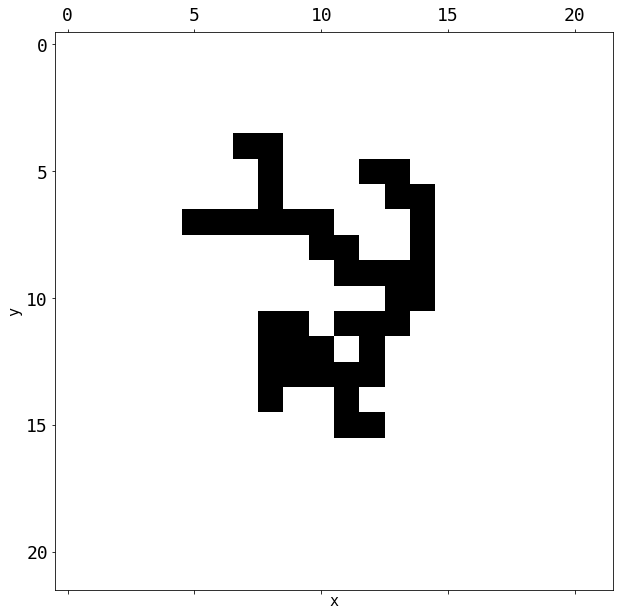

41
The prob of side: 0.0
The prob of point: 0.0


In [4]:
point=[] #append any walkers that stick to points 
side=[] #append any walkers that stick to sides 
it=np.arange(10,11,1)

for i in it:
    prob,lattice=DLA(i)
    seedX=i+2
    seedY=i+2
    squaresize=i*2+2
    
    for row in range(0,squaresize):
        for col in range(0,squaresize): 
            if row==seedY and col==seedX:
                if lattice[seedX+1][seedY]==2:
                    if lattice[seedX-1][seedY]==2:
                        point.append(prob)
                        print("point")
                        
                    elif lattice[seedX+2][seedY]==2:
                        point.append(prob)
                        print("point")
                        
                    else: 
                        side.append(prob)
                        print("side")
                        
                        
                elif lattice[seedX-1][seedY]==2:
                    if lattice[seedX+1][seedY]==2:
                        point.append(prob)
                        print("point")
                    elif lattice[seedX-2][seedY]==2:
                        point.append(prob)
                        print("point")
                        
                    else: 
                        side.append(prob)
                        print("side")
                        
                        
                elif lattice[seedX][seedY+1]==2:
                    if lattice[seedX][seedY-1]==2:
                        point.append(prob)
                        print("point") 
                        
                    elif lattice[seedX][seedY+2]==2:
                        point.append(prob)
                        print("point")
                        
                    else: 
                        side.append(prob)
                        print("side")
                        
                        
                elif lattice[seedX][seedY-1]==2:
                    if lattice[seedX][seedY+1]==2:
                        point.append(prob)
                        print("point") 
                    elif lattice[seedX][seedY-2]==2:
                        point.append(prob)
                        print("point")
                        
                    else: 
                        side.append(prob)
                        print("side")
                        
                        
                        
                        
probpoint=(len(point))/150 #proportion of walkers that stuck to point
probside=(len(side))/150 #proportion of walkers that stuck to side 

print("The prob of side:",probside/4) #4 possible sides so divide by 4
print("The prob of point:",probpoint/2)#2 possible points